## Import Libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal

def rgb2gray(rgb_image):
    return np.dot(rgb_image[...,:3], [0.299, 0.587, 0.114])

## Load Image

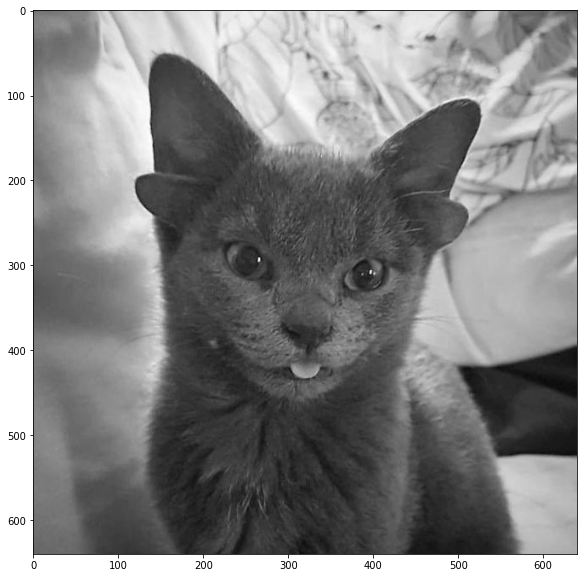

In [27]:
image = mpimg.imread("images/cat.jpeg")
image_gr = rgb2gray(image)

figureSize = (12,10)
plt.figure("Original Image", figsize=figureSize)
plt.imshow(image_gr)
plt.set_cmap("gray")

## Add Noise

## Gaussian Filter

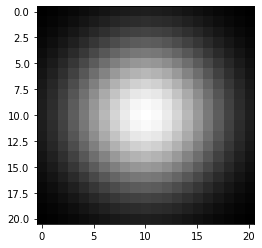

In [28]:
def gaussian_kernel( kernlen , std ):
    """Returns a 2D Gaussian kernel array."""
    gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

plt.imshow(gaussian_kernel(21,5), interpolation='none')

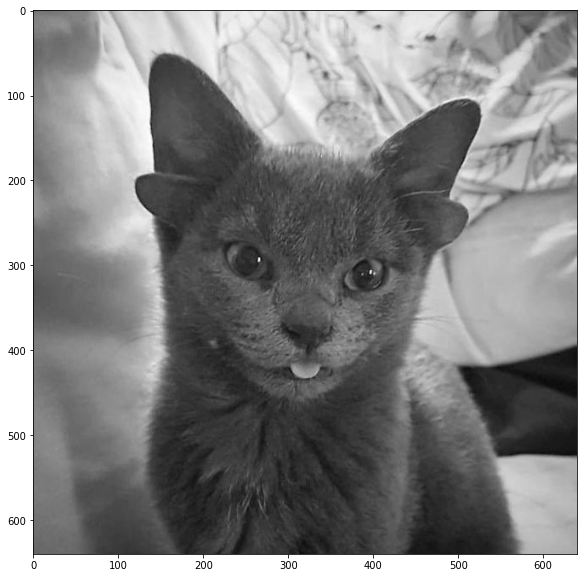

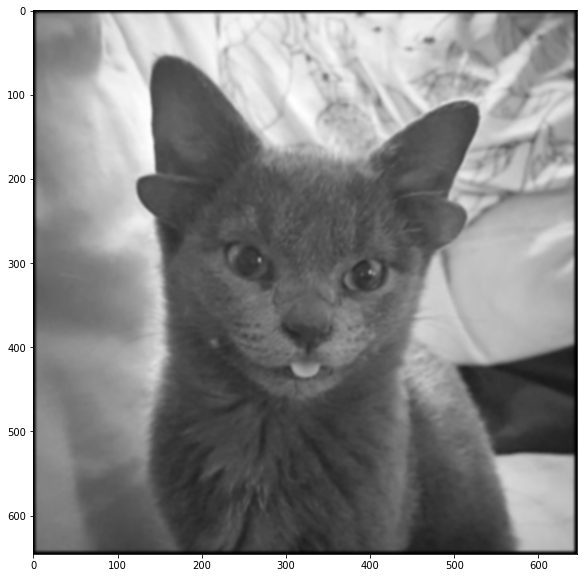

In [29]:
def gaussian_smooth(img, kernel_dim, std):
    return signal.convolve2d(img, gaussian_kernel(kernel_dim, std))

plt.figure("Noised", figsize = figureSize)
plt.imshow(image_gr)

plt.figure("Smoothed", figsize = figureSize)
plt.imshow(gaussian_smooth(image_gr, 7, 1.5))

## Gaussian Filter

[[ 2.88084238  7.85844943 15.50308989 ... 13.21669969  6.70964718
   2.46111916]
 [ 7.90404501 20.30914813 37.85756892 ... 32.32655396 17.37014041
   6.7642647 ]
 [15.70082514 38.1179423  66.35065635 ... 56.80729069 32.68660546
  13.47135633]
 ...
 [15.10282388 36.72115474 63.78758258 ... 99.93642368 57.73203695
  23.8739215 ]
 [ 7.66700003 19.74648899 36.79729417 ... 57.63845215 31.04429126
  12.11924426]
 [ 2.81280954  7.69647339 15.19681918 ... 23.80397114 12.10336706
   4.44726904]]


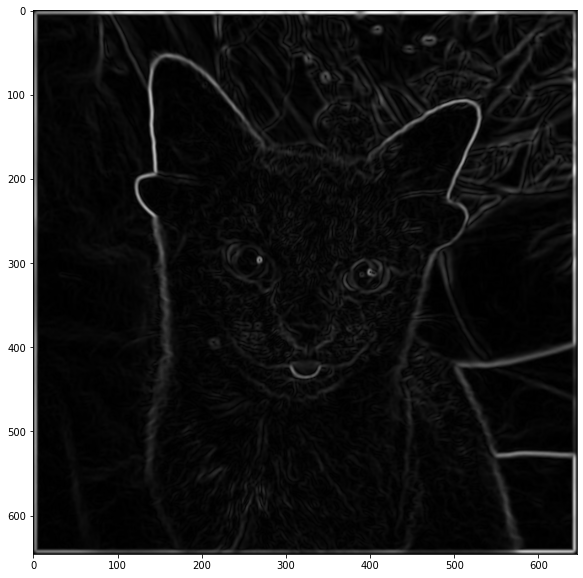

In [39]:
sobel_x = np.array([[ -1 , 0 , 1 ] ,
                    [ -2 , 0 , 2 ] ,
                    [ -1 , 0 , 1 ]])
sobel_y = sobel_x.T

def gradient_sobel(img):
    I_x = signal.convolve2d(img, sobel_x,'same')
    I_y = signal.convolve2d(img, sobel_y,'same')
    magnitude = np.sqrt(I_x ** 2 + I_y ** 2)    
    phase = np.arctan2(I_x, I_y)
    phase = (45 * np.round(phase / (np.pi / 4)) + 180) % 180
    return magnitude, phase

def normalize(img):
    maxi = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] > maxi:
                maxi = img[i][j]
    newimg = np.zeros(img.shape)
    if maxi == 0 :
        return img
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            newimg[i][j] = (img[i][j]/maxi)
    return newimg
    
plt.figure("Sobel Gradient", figsize = figureSize)
grad, phase = gradient_sobel(gaussian_smooth(image_gr, 7, 1.5))
grad = normalize(grad)
print(normalize(grad))
plt.imshow(grad)
#plt.figure("Sobel Phase", figsize = figureSize)
#plt.imshow(b)

## Double Thresholding

In [40]:
#high_ratio = 0.7
#low_ratio = 0.1
#max_val = np.max(grad)

#Th_h = max_val * high_ratio
#Th_l = max_val *  low_ratio


#plt.figure("Below threshold", figsize = figureSize)
#plt.imshow(grad)

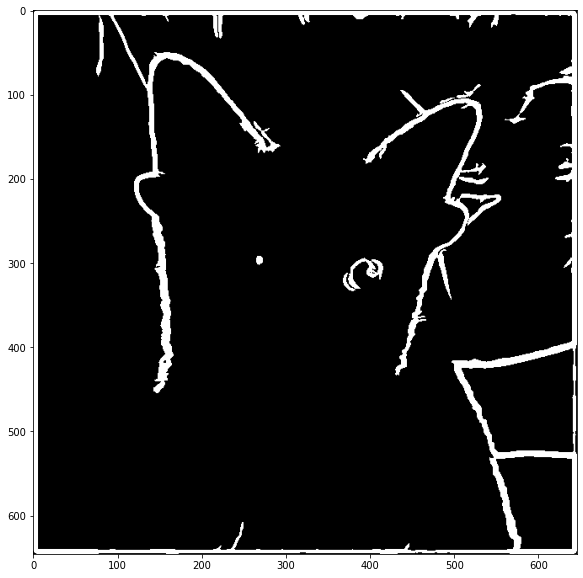

In [66]:
def dfs (img, visited, i, j, max_val):
    n = img.shape[0]*img.shape[1]
    stack = [(i, j)]
    while stack :
        si, sj = stack[-1]
        
        if not visited[si*img.shape[1] + sj]:
            visited[si*img.shape[1] + sj] = True
            for x in [-1, 0, 1]:
                for y in [-1, 0, 1]:
                    new_i = si + x
                    new_j = sj + y
                    if new_i < 0 or new_i >= img.shape[0] or new_j < 0 or new_j >= img.shape[1] or (visited[new_i*img.shape[1] + new_j] == True):
                        continue
                    if img[new_i, new_j] > 0:
                        img[new_i, new_j] = max_val
                        stack.append((new_i, new_j))
        else :
            stack.pop()
            
    return img, visited

def hysteresis(img, low_ratio, high_ratio):
    max_val = np.max(grad)

    Th_h = max_val * high_ratio
    Th_l = max_val *  low_ratio

    img[img <= Th_l] = 0
    img[img > Th_h] = max_val

    visited = [False]*(img.shape[0]*img.shape[1])
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if ((visited[i*img.shape[1]+j] == False) and img[i, j] == max_val):
                img, visited = dfs(img, visited, i, j, max_val) 
                
    img[img < Th_h] = 0
    return img



plt.figure("Hysterisis", figsize = figureSize)
hyst = hysteresis(grad, 0.1, 0.5)
# for i in range(hist.shape[0]):
#     for j in range(hist.shape[1]):
#         if not (hist[i, j] == maxval):
#             continue
#         for x in [-1, 0, 1]:
#             for y in [-1, 0, 1]:
#                 new_i = i + x
#                 new_j = j + y
#                 if new_i < 0 or new_i >= hist.shape[0] or new_j < 0 or new_j >= hist.shape[1] :
#                     continue
#                 if not (hist[new_i, new_j] == maxval or hist[new_i, new_j] == 0):
#                     print(new_i, new_j, i, j)
#                     print(hist[new_i, new_j], hist[i, j])
plt.imshow(hyst)